#### PRELIMINARY OPERATIONS
- This is step we import all the necessary libraries

In [872]:
# inspecting the work space

import os
work_space = os.getcwd()
work_space 

'/Users/apple/Downloads'

In [873]:
import tensorflow as tf
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import os
from IPython.display import display, clear_output

#### Installing COSMOPOWER
- CosmoPower can be conveniently pip-installed from PyPI.

In [874]:
!pip install cosmopower

- Getting dataset

In [875]:
from cosmosis.runtime.pipeline import LikelihoodPipeline
from cosmosis.runtime.config import Inifile
import numpy as np
import pandas as pd

#### Running cosebis cosmois Pipeline to Generate E_modes
- These Emodes are what we going to emulate using cosmopower

In [876]:
# N:B The start vector for params_fiducial was all set at the middle point 

#################################################
# Read in the cosmosis configuration file pipeline.ini 
inifile = 'pipeline11.ini'
ini = Inifile(inifile) 
#################################################

##################################################
# (optional) You can change things or read from ini: 

# set the value of MY_PATH in the [DEFAULT] section to /Users/username/Documents/repos/
# ini.set("DEFAULT","MY_PATH","/Users/username/Documents/repos/")

# get the value of modules in the [pipeline] section
# ini.get("pipeline","modules")

# ini.set("pipeline","modules","sample_S8 sigma8toAs camb")
####################################################

####################################################
# setup the pipeline and give it the ini values
pipeline = LikelihoodPipeline(ini)
# Get the fiducial values
params_fiducial = pipeline.start_vector()
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial)
stats_name_cosmosis ="cosebis"
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"]
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all=th.copy()
			else:
				th_all=np.hstack((th_all,th))
			counter+=1


# th_all should have 75 values: 5 modes x 15 redshift bin combinations (we have 5 redshift bins which create 5*6/2 Unique combinations)
# You want to create th_all for different values of parameters. Currently it will only do this for the fiducial values. 





# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params


# # You can modify which parameters you vary or fix
# pipeline.set_varied("cosmological_parameters", "omch2", 0.2, 0.4)
# pipeline.set_fixed("cosmological_parameters", "h0", 0.72) 

Loading number density data from /Users/apple/Downloads//cosebis_KIDS1000_BlindC_with_m_bias_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_goldclasses_Flag_SOM_Fid.fits:
    Looking at FITS extension NZ_SOURCE:
        Found 5 bins
        Putting n(0) = 0 at the start of the n(z)
Calculating Limber: Kernel 1 = ('F', 'source'), Kernel 2 = ('F', 'source'), P_3D = MatterPower3D  --> Output: shear_cl
Will project these spectra into 2D:
    -  shear_cl




*********in COSEBIs interface setup*********

Could not load input_section_name to COSEBIs,setting to default: shear_cl
got the value of output_section_name:cosebis
Caluclating E-modes
got the value of theta_min=0.5
got the value of theta_max=300
got the value of n_max=5
not using c_term correction
WnLog folder name is:/Users/apple/Downloads//WnLog/
Root and Norms folder name is:/Users/apple/Downloads//cosebis_cosmosis//TLogsRootsAndNorms/
T_pm folder name is:/Users/apple/Downloads//cosebis_cosmosis//TpnLog/
in COSEBIs initialize
setting En parameters in COSEBIs
nMaximum=5
theta_min=0.000145444
theta_max=0.0872665
Wn not set setting now:
setting thetamin,thetamax,nMax
nMax=5
reading T1  roots	reading T1  normalization
reading T2  roots	reading T2  normalization
reading T3  roots	reading T3  normalization
reading T4  roots	reading T4  normalization
reading T5  roots	reading T5  normalization
set order of WnLog
LLOW=0 LHIGH=11.6491 NLBINS=1000000
log [0,11.6491] N=1000000)
set order of

Setup all pipeline modules
Module timing:
sample_S8 0.151880
sigma8toAs 0.026773
camb 0.033169
load_nz_fits 0.218927
extrapolate_power 0.022192
linear_alignment 0.033813
projection 0.065184
cosebis 16.029194

Parameter Priors
----------------
cosmological_parameters--omch2      ~ U(0.051, 0.255)
cosmological_parameters--ombh2      ~ U(0.019, 0.026)
cosmological_parameters--h0         ~ U(0.64, 0.82)
cosmological_parameters--n_s        ~ U(0.84, 1.1)
cosmological_parameters--s_8_input  ~ U(0.1, 1.3)
cosmological_parameters--omega_k    ~ delta(0.0)
cosmological_parameters--w          ~ delta(-1.0)
cosmological_parameters--wa         ~ delta(0.0)
cosmological_parameters--mnu        ~ delta(0.06)
halo_model_parameters--logt_agn     ~ U(7.6, 8.0)
intrinsic_alignment_parameters--a   ~ U(-6.0, 6.0)

sample_S8 took: 0.003 seconds
sigma8toAs took: 0.694 seconds
camb took: 6.094 seconds
load_nz_fits took: 0.004 seconds
extrapolate_power took: 0.155 seconds
linear_alignment took: 0.014 seconds
pr

In [877]:
print(th_all)

[6.10161452e-11 7.06184838e-11 4.85104231e-11 2.92385905e-11
 1.90692189e-11 7.39688929e-11 8.41882480e-11 5.50322205e-11
 3.36053154e-11 2.48118394e-11 6.66847289e-11 7.55337857e-11
 4.66804347e-11 2.75998088e-11 2.25960002e-11 6.36605747e-11
 7.17718723e-11 4.22629276e-11 2.40654313e-11 2.14142548e-11
 6.45868615e-11 7.26807068e-11 4.22358427e-11 2.34640061e-11
 2.11479444e-11 2.85354133e-10 3.19945322e-10 2.38260551e-10
 1.69857164e-10 1.08337902e-10 3.48061049e-10 3.89916501e-10
 2.93950310e-10 2.12743232e-10 1.34604979e-10 3.96374784e-10
 4.43429590e-10 3.36840640e-10 2.47970631e-10 1.57734303e-10
 4.10633120e-10 4.59126457e-10 3.49314446e-10 2.58429651e-10
 1.64843788e-10 6.09039226e-10 6.89191312e-10 5.36858883e-10
 3.77427857e-10 2.16383583e-10 8.33132336e-10 9.46276855e-10
 7.46010831e-10 5.20305155e-10 2.88132548e-10 9.02674071e-10
 1.02639865e-09 8.12388307e-10 5.67048289e-10 3.12239623e-10
 1.37057441e-09 1.56334562e-09 1.23275250e-09 8.18920621e-10
 4.15973789e-10 1.588533

#### Cosmological parameters and its values

## Aim: To train a cosmopower to emulate the theory vector `th_all` 
### Step_1: 
- Set all the Cosmological parameter to the lowest number and observe the Thoeretical_value(th_all)
* In a bid to monitor the progress 5 cosmological value will be changed, both and halo and instrinsic alig will remain

In [878]:
# Get the fiducial values
params_fiducial_1 = [0.051,0.019,0.64,0.84,0.1,7.6,-6.0] 

# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial_1)
stats_name_cosmosis ="cosebis"

# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_1=th.copy()
			else:
				th_all_1=np.hstack((th_all_1,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.001 seconds
sigma8toAs took: 0.633 seconds
camb took: 5.539 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.007 seconds
projection took: 0.778 seconds
cosebis took: 0.570 seconds
Total pipeline time: 7.6 seconds
Pipeline ran okay.


In [879]:
# Discover that the th_all_1 changed because we passed in new values for params_fiducial_1

print(th_all_1)

[1.39234309e-11 2.52462693e-11 2.81239496e-11 2.24792289e-11
 1.39807018e-11 1.01884471e-11 1.81949646e-11 1.98675049e-11
 1.55237985e-11 9.43501298e-12 9.70388170e-12 1.73366700e-11
 1.89409959e-11 1.48040576e-11 8.98738710e-12 1.04770454e-11
 1.86981031e-11 2.04041316e-11 1.59341218e-11 9.67846941e-12
 1.14485347e-11 2.04005183e-11 2.22189485e-11 1.73163810e-11
 1.04992877e-11 1.62982155e-11 2.84405688e-11 3.00932243e-11
 2.26572217e-11 1.32428043e-11 1.38933533e-11 2.41225336e-11
 2.53396954e-11 1.88815692e-11 1.08544503e-11 1.46055635e-11
 2.53817408e-11 2.67035817e-11 1.99536108e-11 1.15383487e-11
 1.67977021e-11 2.91421584e-11 3.05900514e-11 2.27963133e-11
 1.31430572e-11 1.82160737e-11 3.08396665e-11 3.11907887e-11
 2.20045032e-11 1.16347694e-11 1.93004696e-11 3.25680407e-11
 3.28087596e-11 2.30838407e-11 1.22705792e-11 2.15421158e-11
 3.63940559e-11 3.67361994e-11 2.59278012e-11 1.38395258e-11
 2.76518563e-11 4.56652135e-11 4.46633664e-11 3.04222875e-11
 1.59201600e-11 2.980997

### Step:2 
- Set the Cosmological Parameter omhch2 to `0.1157` and let other remain 
* Monitor the th_all

In [880]:
# pipeline = LikelihoodPipeline(ini)



# Get the fiducial values
params_fiducial_2 = [0.1157,0.019,0.64,0.84,0.1,7.6,-6.0] 

# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial_2)
stats_name_cosmosis ="cosebis"

# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_2=th.copy()
			else:
				th_all_2=np.hstack((th_all_2,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.865 seconds
camb took: 6.443 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.103 seconds
linear_alignment took: 0.007 seconds
projection took: 1.239 seconds
cosebis took: 0.552 seconds
Total pipeline time: 9.21 seconds
Pipeline ran okay.


In [881]:
# N:B Values of the th_all_2 changes because different values was passed for the params_fiducial_2

print(th_all_2)  

[2.93098838e-11 4.89090594e-11 4.86583523e-11 3.39812168e-11
 1.83091922e-11 1.94052478e-11 3.15554978e-11 3.02946797e-11
 2.02808642e-11 1.04808000e-11 1.77331936e-11 2.89711892e-11
 2.80195952e-11 1.89471079e-11 9.89998074e-12 1.83767981e-11
 3.00514662e-11 2.91119177e-11 1.97359818e-11 1.03521760e-11
 1.98201417e-11 3.23603426e-11 3.12766964e-11 2.11418355e-11
 1.10536094e-11 2.89471113e-11 4.50418823e-11 4.05019557e-11
 2.48850201e-11 1.16959264e-11 2.26914713e-11 3.51415619e-11
 3.14146997e-11 1.91764631e-11 8.93869977e-12 2.19445264e-11
 3.41537323e-11 3.07731716e-11 1.90070020e-11 9.01195113e-12
 2.48485777e-11 3.85779306e-11 3.46233800e-11 2.12644595e-11
 1.00087127e-11 2.83039245e-11 4.21877661e-11 3.55833853e-11
 2.00287338e-11 8.42729391e-12 2.70834485e-11 4.03418269e-11
 3.40697129e-11 1.93279626e-11 8.35936128e-12 2.85883918e-11
 4.28019606e-11 3.64207069e-11 2.08567436e-11 9.08137911e-12
 3.73307599e-11 5.35399666e-11 4.27078389e-11 2.25489654e-11
 9.33864123e-12 3.688239

### Step 3
- return `omch2` back to `0.051` and set `ombh2` to `0.0255` 
- Check the th_all while other parameter remain the same

In [882]:
# pipeline = LikelihoodPipeline(ini)


# Get the fiducial values
params_fiducial_3 = [0.051,0.0225,0.64,0.84,0.1,7.6,-6.0] 

# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial_3)
stats_name_cosmosis ="cosebis"

# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_3=th.copy()
			else:
				th_all_3=np.hstack((th_all_3,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.574 seconds
camb took: 5.677 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.113 seconds
linear_alignment took: 0.005 seconds
projection took: 0.766 seconds
cosebis took: 0.572 seconds
Total pipeline time: 7.71 seconds
Pipeline ran okay.


In [883]:
# N:B Values of the th_all_3 changes because different values was passed for the params_fiducial_2


print(th_all_3)

[1.45892434e-11 2.64960731e-11 2.95820811e-11 2.37148306e-11
 1.48056114e-11 1.06685356e-11 1.90891388e-11 2.09009833e-11
 1.63900570e-11 1.00053080e-11 1.01228588e-11 1.81163786e-11
 1.98383662e-11 1.55480254e-11 9.46602665e-12 1.09028795e-11
 1.94951980e-11 2.13299798e-11 1.67133426e-11 1.01937243e-11
 1.19087058e-11 2.12630487e-11 2.32222103e-11 1.81612282e-11
 1.10565193e-11 1.71342523e-11 2.99755809e-11 3.18345537e-11
 2.40818814e-11 1.41480688e-11 1.45264882e-11 2.52727595e-11
 2.66150250e-11 1.98764588e-11 1.14253114e-11 1.51920545e-11
 2.64630707e-11 2.79301155e-11 2.09454450e-11 1.21463630e-11
 1.74637293e-11 3.03709017e-11 3.19835160e-11 2.39195791e-11
 1.38233515e-11 1.90411783e-11 3.22686783e-11 3.26433280e-11
 2.29666727e-11 1.20165743e-11 2.00599503e-11 3.39041949e-11
 3.42117963e-11 2.40922277e-11 1.27991004e-11 2.23110707e-11
 3.77600118e-11 3.81834069e-11 2.69649709e-11 1.43527752e-11
 2.88154832e-11 4.77197765e-11 4.68911479e-11 3.22219284e-11
 1.72213032e-11 3.090071

## GENERATING DATASET 
### `Latin hypercube sampling`  and `Monte Carlo Sampling`
* To generate my dataset i will be compare `Monte Carlo Sampling` to `Latin Hypercube sample` and i will be using `LHS` for some obvious reasons. 
- 1. `LHS` generate new random sample from equal probablity within samples using normal distribution hence the samples are not over-laid with each other

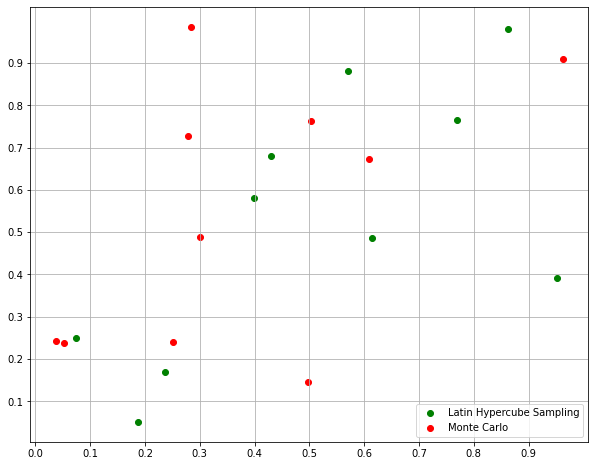

In [884]:
import lhsmdu
# Monte Carlo sampling
l = lhsmdu.createRandomStandardUniformMatrix(2, 10)

# Latin Hypercube Sampling with multi-dimensional uniformity
k = lhsmdu.sample(2, 10) 

# Converting to numpy array
k = np.array(k)
l = np.array(l)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(0,1,0.1))
plt.scatter(k[0], k[1], color="g", label="Latin Hypercube Sampling")
plt.scatter(l[0], l[1], color="r", label="Monte Carlo")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [887]:
# Importing the require library
from scipy.stats import qmc

sample = list()

def latin_hypercube_sampling():
    """This function is created to generated random sample of data
    using Latin Hypercube Sample method to reduce noise and generate unique
    data with the limit of each cosmological parameter"""
    
    # calling the modules LatinHyperCube from QMC for (D is the number of parameters, n: number of sample)
    s = qmc.LatinHypercube(d = 7)
    sam = s.random(n=150) 
    
    # setting up limit for the 7 cosmological hyperparameter 
    lower_limit = [0.051, 0.019, 0.64, 0.84, 0.1, 7.6, -6.0]
    upper_limit = [0.255, 0.026, 0.82, 1.1, 1.3, 8.0, 6.0] 
    
    lhs=qmc.scale(sam, lower_limit, upper_limit)
    
    # Appending the list within the limit 
    sample.append(lhs)
latin_hypercube_sampling()  

In [888]:
sample = sample[0]
sample_ = sample.tolist() 

##### Preparing Training parameters
- The below cell shows preparation of cosmological training parameters

In [893]:
df = pd.DataFrame(sample_,columns=['omch2', 'ombh2', 'h0','n_s', 's8_input', 
                                                    'halo_model', 'intrinsic_A'] ) 

# # Saving the output
# df.to_csv("cosmosis_project_dataset.csv")

# Loading the dataset
df = pd.read_csv("cosmosis_project_dataset.csv")  
df.head() 

,omch2,ombh2,h0,n_s,s8_input,halo_model,intrinsic_A
0,0.220391,0.019162,0.669431,0.861554,0.211966,7.694937,-2.707531
1,0.099775,0.021219,0.659530,0.844513,0.725137,7.697160,3.898727
2,0.058208,0.024394,0.699565,1.076392,0.941000,7.945830,-1.900542
3,0.193736,0.021120,0.692335,1.099584,1.169523,7.704067,3.302266
4,0.180244,0.025190,0.772035,0.957957,0.392173,7.610546,2.800448


In [894]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (150, 7)


### TRAINING DATA DOWNLOAD
#### Splitting The dataset to Train/Test
- 400 samples of our LHS(Latin Hypercube sample) data will be used for train and 100 samples will be used for testing. i.e 80:20 train/test ratio
* Bellow cell inidcate the process 

In [898]:
x_label_N = df[0:120]

# Saving the parameters into dict of np.array for each key of the cosmological parameters
from numpy import savez_compressed 
savez_compressed("training_parameters.npz", **x_label_N) 

In [899]:
# Loading/Reading the saved file
training_parameters  = np.load("training_parameters.npz",allow_pickle=True) 

training_parameters is a dict of np.arrays. There is a dict key for each of the parameters the emulator is going to be trained on:

In [900]:
print("Cosmological Paramters in the training set are: ", training_parameters.files)

Cosmological Paramters in the training set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


N:B Each of these keys has an associated np.array of values. The length of these arrays is the number of training samples in that file

In [901]:
print(training_parameters['omch2'])
print('number of training samples: ', len(training_parameters['omch2'])) # same for all of the other parameters

[0.220391   0.099775   0.05820834 0.19373635 0.18024444 0.05500212
 0.24235922 0.06837195 0.17378237 0.22928979 0.21870162 0.2076038
 0.10407823 0.24099632 0.23773051 0.15598465 0.18174347 0.08723183
 0.12367397 0.19969356 0.101637   0.22297732 0.06730389 0.07109142
 0.2343602  0.13486425 0.12966759 0.15826896 0.12649271 0.20673465
 0.14374739 0.17916763 0.15184103 0.07705056 0.13654309 0.11008901
 0.20126509 0.1844753  0.16926432 0.11219478 0.14841081 0.0600142
 0.21623178 0.23075363 0.22375588 0.2393647  0.07405241 0.11495571
 0.24872407 0.22832713 0.19870981 0.19238995 0.17754923 0.0566148
 0.08049094 0.14738347 0.17261059 0.11686007 0.06438484 0.21389998
 0.16603873 0.16318531 0.16510564 0.05515664 0.195797   0.24632232
 0.14346379 0.15501156 0.06586209 0.1010584  0.13137188 0.07501503
 0.05102931 0.16771088 0.21270804 0.15332507 0.25316174 0.1273688
 0.17580228 0.25435869 0.09132803 0.0692172  0.20241821 0.11900379
 0.15955875 0.09475264 0.1381472  0.23639469 0.08563251 0.11444861

## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our training parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 400 samples hence

In [902]:
# Converting to list
training_feature = x_label_N.values.tolist()   

In [903]:
%%time
# Passing the list of the training features to generate cosebis emodes for the 120 samples 

final_list = list() 
for values in training_feature:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.002 seconds
sigma8toAs took: 0.631 seconds
camb took: 5.962 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.117 seconds
linear_alignment took: 0.009 seconds
projection took: 0.748 seconds
cosebis took: 1.326 seconds
Total pipeline time: 8.81 seconds
Pipeline ran okay.
sample_S8 took: 0.001 seconds
sigma8toAs took: 0.765 seconds
camb took: 4.863 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.713 seconds
cosebis took: 0.721 seconds
Total pipeline time: 7.14 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.736 seconds
camb took: 4.736 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.776 seconds
cosebis took: 0.571 seconds
Total pipeline time: 6.89 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.327 seconds
camb took: 4.538 seco

/Users/apple/Downloads//cosmosis-standard-library//structure/projection/projection_tools/kernel.py:154: RuntimeWarning: invalid value encountered in true_divide
  nchi_spline.y * (nchi_spline.x - chi)/nchi_spline.x, 0.)


projection took: 0.720 seconds
cosebis took: 0.548 seconds
Total pipeline time: 6.97 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.452 seconds
camb took: 5.081 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.101 seconds
linear_alignment took: 0.007 seconds
projection took: 3.569 seconds
cosebis took: 1.025 seconds
Total pipeline time: 10.2 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.433 seconds
camb took: 4.933 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.079 seconds
linear_alignment took: 0.005 seconds
projection took: 0.652 seconds
cosebis took: 0.568 seconds
Total pipeline time: 6.67 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.454 seconds
camb took: 7.621 seconds
load_nz_fits took: 0.003 seconds
extrapolate_power took: 0.088 seconds
linear_alignment took: 0.007 seconds
projection took: 1.096 seconds
cosebis took: 0.886 seconds
Total pipeline time: 10

projection took: 0.727 seconds
cosebis took: 0.558 seconds
Total pipeline time: 6.52 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.335 seconds
camb took: 4.619 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.005 seconds
projection took: 0.702 seconds
cosebis took: 0.557 seconds
Total pipeline time: 6.29 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.419 seconds
camb took: 4.425 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.074 seconds
linear_alignment took: 0.005 seconds
projection took: 0.754 seconds
cosebis took: 0.570 seconds
Total pipeline time: 6.25 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.433 seconds
camb took: 4.397 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.005 seconds
projection took: 0.798 seconds
cosebis took: 0.662 seconds
Total pipeline time: 6.

projection took: 1.770 seconds
cosebis took: 0.790 seconds
Total pipeline time: 11.6 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.369 seconds
camb took: 6.571 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.081 seconds
linear_alignment took: 0.005 seconds
projection took: 0.760 seconds
cosebis took: 0.617 seconds
Total pipeline time: 8.4 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.419 seconds
camb took: 5.955 seconds
load_nz_fits took: 0.002 seconds
extrapolate_power took: 0.108 seconds
linear_alignment took: 0.005 seconds
projection took: 0.684 seconds
cosebis took: 0.545 seconds
Total pipeline time: 7.72 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.344 seconds
camb took: 5.139 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.072 seconds
linear_alignment took: 0.005 seconds
projection took: 0.736 seconds
cosebis took: 0.552 seconds
Total pipeline time: 6.8

projection took: 0.893 seconds
cosebis took: 0.666 seconds
Total pipeline time: 8.59 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.884 seconds
camb took: 5.593 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.073 seconds
linear_alignment took: 0.005 seconds
projection took: 0.821 seconds
cosebis took: 0.627 seconds
Total pipeline time: 8.01 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.457 seconds
camb took: 5.497 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.094 seconds
linear_alignment took: 0.007 seconds
projection took: 0.624 seconds
cosebis took: 0.602 seconds
Total pipeline time: 7.28 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.444 seconds
camb took: 5.675 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.086 seconds
linear_alignment took: 0.005 seconds
projection took: 0.824 seconds
cosebis took: 0.770 seconds
Total pipeline time: 7.

projection took: 0.704 seconds
cosebis took: 0.653 seconds
Total pipeline time: 6.66 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.543 seconds
camb took: 6.900 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.136 seconds
linear_alignment took: 0.006 seconds
projection took: 0.815 seconds
cosebis took: 0.598 seconds
Total pipeline time: 9.0 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.632 seconds
camb took: 13.350 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.005 seconds
projection took: 1.139 seconds
cosebis took: 0.641 seconds
Total pipeline time: 15.8 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.443 seconds
camb took: 6.710 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.285 seconds
linear_alignment took: 0.013 seconds
projection took: 1.070 seconds
cosebis took: 0.926 seconds
Total pipeline time: 9.

#### Preparing the cosebis_Emodes 
- Below cell shows the how the generated output from cosebis cosmosis were prepared for training process

In [904]:
COSEBIs_E_modes = []
for i in final_list:
    if len(i) == 75:
        COSEBIs_E_modes.append(i)
         
len(COSEBIs_E_modes) 

120

In [905]:
COSEBIs_E_modes = pd.Series(data=COSEBIs_E_modes) 
COSEBIs_E_modes = pd.DataFrame({"features" : np.array(COSEBIs_E_modes), 
                                         "modes" : list(range(0,120)) })  

In [906]:
COSEBIs_E_modes 

,features,modes
0,"[6.648394429813665e-11, 9.829514389291148e-11,...",0
1,"[3.5411986929099253e-10, 4.3874564557221635e-1...",1
2,"[5.178620771437884e-10, 5.472148802294742e-10,...",2
3,"[1.1126516674440906e-09, 1.0180822315213411e-0...",3
4,"[4.880814610609795e-11, 6.499753733633163e-11,...",4
...,...,...
115,"[4.310601740300272e-13, 7.464411553157398e-13,...",115
116,"[2.129865314690619e-11, 3.344435400500766e-11,...",116
117,"[3.2740420029530165e-11, 4.747958041783492e-11...",117
118,"[1.168289421963695e-11, 1.5848957352720096e-11...",118


In [907]:
### Saving the cosebis_Emodes 
training_COSEBIs_E_modes = COSEBIs_E_modes.to_dict(orient="list")  
savez_compressed("training_COSEBIs_E_modes.npz", **training_COSEBIs_E_modes) 

In [908]:
### Loading/Reading Cosebis

training_COSEBIs_E_modes = np.load("training_COSEBIs_E_modes.npz", allow_pickle=True)  

In [909]:
training_COSEBIs_E_modes.files

['features', 'modes']

In [910]:
len(training_COSEBIs_E_modes["features"])

120

In [911]:
print(training_COSEBIs_E_modes["features"])

[[6.64839443e-11 9.82951439e-11 8.50824774e-11 ... 1.32045136e-10
  5.58489442e-11 1.98177370e-11]
 [3.54119869e-10 4.38745646e-10 3.81958389e-10 ... 1.69421471e-09
  1.12223249e-09 5.64804699e-10]
 [5.17862077e-10 5.47214880e-10 3.47189541e-10 ... 2.45339928e-09
  1.75146386e-09 9.92881381e-10]
 ...
 [3.27404200e-11 4.74795804e-11 3.93856635e-11 ... 1.09176090e-10
  5.12193074e-11 1.91871306e-11]
 [1.16828942e-11 1.58489574e-11 1.35882293e-11 ... 2.30902008e-10
  1.14285245e-10 4.46865452e-11]
 [5.38426124e-10 6.60882060e-10 5.49767055e-10 ... 5.42095084e-10
  2.34826632e-10 8.52202356e-11]]


In [912]:
# We are going to use variable COSEBIs declare here to train our cosmopower 

# N:B Weed to ratio our model by divide it with the start_vector theory value
COSEBIs =training_COSEBIs_E_modes['features']/ th_all       
print('(number of training samples, number of ell modes): ', COSEBIs.shape) 

(number of training samples, number of ell modes):  (120, 75)


In [1130]:
COSEBIs

array([[ 1.08961233,  1.39191807,  1.75390096, ...,  0.07494525,
         0.05031212,  0.03789932],
       [ 5.80370766,  6.21290096,  7.87373856, ...,  0.96159047,
         1.01097521,  1.08012909],
       [ 8.48729587,  7.74889025,  7.15700912, ...,  1.39248311,
         1.57782505,  1.89878035],
       ...,
       [ 0.53658618,  0.67233928,  0.81190105, ...,  0.0619654 ,
         0.04614146,  0.03669335],
       [ 0.19147218,  0.22443072,  0.28010948, ...,  0.13105374,
         0.10295509,  0.08545828],
       [ 8.8243222 ,  9.35848555, 11.33296763, ...,  0.30767852,
         0.2115461 ,  0.16297466]])

## TESTING DATA
- The files for the `testing samples` have the same type of content
- N:B we are using 100 samples to test our model after training

In [913]:
# Declaring the Testing parameters
test_parameters = df[120:150]   

### Preparing the `test_params` just as i did for training parameters
- Aim is to have the dict and key same as training_parameters, each key 🔑 contain np.array of respective cosmological parameters

In [914]:
test_params_dict = test_parameters.to_dict(orient="list") 

# Saving the test_params_dict
savez_compressed("test_params.npz", **test_params_dict) 

In [915]:
#Loading/Reading of test_params
test_params = np.load("test_params.npz",allow_pickle=True ) 

In [916]:
test_params.files

['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']

In [917]:
print(test_params['omch2'])
print('number of training samples: ', len(test_params['omch2'])) # same for all of the other parameters

[0.12145903 0.09836821 0.07235803 0.21091453 0.25119865 0.06278082
 0.23272853 0.05237926 0.18697859 0.08137353 0.25080038 0.21538568
 0.16076459 0.23580933 0.14951625 0.24520401 0.13756956 0.18919497
 0.14001648 0.09019114 0.20879808 0.13357753 0.20576829 0.08813169
 0.21726472 0.09602111 0.12542924 0.18751257 0.11840026 0.2436808 ]
number of training samples:  30


In [918]:
print("Cosmological Paramters in the test set are: ", test_params.files)

Cosmological Paramters in the test set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our test parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 100 samples hence

In [919]:
# Creating testing parameters
test_set = test_parameters.values.tolist() 

In [920]:
%%time

# Passing the list of the training features to generate cosebis emodes for the 120 samples 


final_list = list() 
for values in test_set:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0 
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.708 seconds
camb took: 6.495 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.090 seconds
linear_alignment took: 0.005 seconds
projection took: 0.785 seconds
cosebis took: 0.568 seconds
Total pipeline time: 8.65 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.437 seconds
camb took: 7.006 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.117 seconds
linear_alignment took: 0.013 seconds
projection took: 1.576 seconds
cosebis took: 0.708 seconds
Total pipeline time: 9.86 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.472 seconds
camb took: 7.252 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.108 seconds
linear_alignment took: 0.006 seconds
projection took: 1.079 seconds
cosebis took: 0.897 seconds
Total pipeline time: 9.82 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.564 seconds
camb took: 7.398 seco

/Users/apple/Downloads//cosmosis-standard-library//structure/projection/projection_tools/kernel.py:154: RuntimeWarning: invalid value encountered in true_divide
  nchi_spline.y * (nchi_spline.x - chi)/nchi_spline.x, 0.)


projection took: 0.654 seconds
cosebis took: 0.548 seconds
Total pipeline time: 8.08 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.482 seconds
camb took: 4.554 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.005 seconds
projection took: 0.788 seconds
cosebis took: 0.595 seconds
Total pipeline time: 6.5 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.362 seconds
camb took: 4.581 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.076 seconds
linear_alignment took: 0.006 seconds
projection took: 0.652 seconds
cosebis took: 0.514 seconds
Total pipeline time: 6.19 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.425 seconds
camb took: 4.434 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.005 seconds
projection took: 0.731 seconds
cosebis took: 0.576 seconds
Total pipeline time: 6.2

#### Preparing the Testing cosebis_Emodes 
- Below cell shows the how the generated output from cosebis cosmosis were prepared for testing process 

In [921]:
# Filtering: Appending all the length of np. array at full node for all the bins of all 5 Redshift
testing_COSEBIs_E_modes = []
for i in final_list: 
    if len(i) == 75:
        testing_COSEBIs_E_modes.append(i)
        
len(testing_COSEBIs_E_modes)

30

In [922]:
# Again, we need to divide our cosebis output by the start _vector theory values as we did for training
testing_COSEBIs_E_modes = testing_COSEBIs_E_modes/th_all

In [1129]:
testing_COSEBIs_E_modes

array([[10.10899803,  8.81751513,  8.03174599, ...,  1.50836294,
         1.59651313,  1.73448546],
       [ 0.23810394,  0.30329801,  0.43058233, ...,  0.19247395,
         0.18424902,  0.18282412],
       [ 3.99891378,  3.83554559,  4.27963247, ...,  0.74475339,
         0.80120476,  0.8661007 ],
       ...,
       [ 8.43518727,  7.8472484 ,  8.59973272, ...,  0.69278712,
         0.57972265,  0.48048778],
       [ 8.71921871,  8.55251231,  9.27610037, ...,  1.69547797,
         1.707936  ,  1.76604544],
       [41.71500878, 34.50992521, 33.7337422 , ...,  0.83402968,
         0.532327  ,  0.36451107]])

### **`cosmopower_NN` INSTANTIATION**
We will now create an instance of the `cosmopower_NN` class, which we will subsequently train.

In order to instantiate the class, we need to first define some of the key aspects of our model.

#### PARAMETERS
- First process, is to define the model paramters. These are the model parameter cosmopower will use for each prediction.

- lets's say, for example, we want to emulate over a set of 7 standard  Λ CDM parameters,

- 𝜔b,𝜔cdm,ℎ,𝜏,𝑛𝑠,s8_input, ln1010𝐴𝑠 

- we need to create a list with the names of all of these parameters, in arbitrary order:

In [923]:
# list of parameter names, in arbitrary order required to train the `cosmopower_NN`
model_parameters = ['omch2', 
                    'ombh2', 
                    'h0', 
                    'n_s', 
                    's8_input', 
                    'halo_model',
                    "intrinsic_A"
                    ] 

This `model_parameters` will be sent in input to the cosmopower_NN class, which will use this information:
- to derive the number of parameters in our model, equal to the number of elements in `model_parameters`. This number also corresponds to the number of nodes in the input layer of the `neural network`;
- N;B This process improve the model and help user from manually ordering the input parameter

## MODES
- A second, important piece of information for the `cosmopower_NN class` is the number of its output nodes, which corresponds to the number of sampled `COSEBIS` output in this case it is 75.
- i.e. the number of multipoles  ℓ  for the `Cosebis_Emodes` sample, or is the number of the `th_all` 
- In the Research, i want to emulate all the `th_all` between 0 and 75
- We can read the sampled  ℓ  range from the modes entry of our `training_COSEBIs_E_modes` dict (previously loaded):

In [924]:
# We are you to use list of output nodes declare here to train our cosmopower

output_modes = list(range(1,76))

## CLASS INSTANTIATION
- Finally, let's feed the information on model parameters and number of outputs to the cosmopower_NNclass, which we instantiate with the following:

In [1109]:
from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [128, 128, 128], # 3 hidden layers, each with 128 nodes
                      verbose=True # useful to understand the different steps in initialisation and training
                      ) 


Initialized cosmopower_NN model, 
mapping 7 input parameters to 75 output modes, 
using 3 hidden layers, 
with [128, 128, 128] nodes, respectively. 



Please note the more than hidden layer, more the model become dense and too much can cause over- fitting

## TRAINING
- In this section we will train our model. To do this, we will call the method train() from the `cosmopower_NN class`. Here are the input arguments for this function:
- `training_parameters`: as explained above, this is a `dict` of `np.arrays` of `input parameters`. Each `dict` key has a `np.array` of values, for example

In [1110]:
%%time 
cp_nn.train(training_parameters=training_parameters,
                training_features=COSEBIs,
                filename_saved_model='cosmosis_model_v2',
                # cooling schedule 
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                ) 

Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


 15%|████▍                        | 152/1000 [00:03<00:19, 43.76it/s, loss=4.47]


Validation loss = 1.7996953
Model saved.
Reached max number of epochs. Validation loss = 1.7996953
Model saved.
learning rate = 0.001, batch size = 1024


100%|████████████████████████████| 1000/1000 [00:20<00:00, 48.72it/s, loss=2.46]


Reached max number of epochs. Validation loss = 2.4571433
Model saved.
learning rate = 0.0001, batch size = 1024


 10%|██▉                          | 100/1000 [00:01<00:17, 51.12it/s, loss=0.54]


Validation loss = 0.06696304
Model saved.
Reached max number of epochs. Validation loss = 0.06696304
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|██▊                         | 100/1000 [00:01<00:17, 50.10it/s, loss=0.596]


Validation loss = 0.16079073
Model saved.
Reached max number of epochs. Validation loss = 0.16079073
Model saved.
learning rate = 1e-06, batch size = 1024


 29%|████████▏                   | 294/1000 [00:05<00:13, 51.49it/s, loss=0.116]

Validation loss = 0.11481368
Model saved.
Reached max number of epochs. Validation loss = 0.11481368
Model saved.
CPU times: user 24.8 s, sys: 3.35 s, total: 28.2 s
Wall time: 33.8 s


## TESTING 
- Aim is to test the created `cosmopower_NN`, by calling its name
- Note that it was saved with `cosmosis_model_v2` 

In [1111]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='cosmosis_model_v2',
                      ) 

Let's compute the predictions for the testing parameters. Note that we use the function `predictions_np`, for the given input parameters,

In [1112]:
predicted_COSEBIs_Emodes = cp_nn.predictions_np(test_params)
predicted_COSEBIs_Emodes 

array([[ 9.75406822,  8.71288015,  8.18328291, ...,  1.52102211,
         1.60964192,  1.79315302],
       [ 0.097199  ,  0.23426205,  0.36152163, ...,  0.1993834 ,
         0.1838635 ,  0.17072143],
       [ 4.0469015 ,  3.97229564,  4.6883658 , ...,  0.75076538,
         0.79051365,  0.84939438],
       ...,
       [ 8.54559025,  7.8833092 ,  8.46434839, ...,  0.66394496,
         0.55941396,  0.45089884],
       [ 8.24116768,  8.62529473,  9.49895169, ...,  1.61777649,
         1.57399014,  1.57041844],
       [39.16448937, 33.66988837, 33.50077142, ...,  0.81654579,
         0.52824437,  0.36713899]])

In [1113]:
predicted_COSEBIs_Emodes[0]

array([ 9.75406822,  8.71288015,  8.18328291,  9.33320799, 10.23170356,
        8.75257489,  7.90396488,  7.89533085,  8.90895064,  8.27173739,
       11.66007251, 10.48800224, 11.12942075, 13.14837242, 10.99481463,
       14.53295546, 13.07699243, 14.68714293, 18.20947144, 13.86455116,
       15.41206514, 13.88899961, 15.89435888, 20.24631176, 15.09774846,
        2.89212125,  2.698851  ,  2.51515177,  2.46238677,  2.42464867,
        2.92726837,  2.71512154,  2.51148107,  2.44179445,  2.41483294,
        3.23235909,  2.99228567,  2.78537314,  2.69200157,  2.60874743,
        3.457949  ,  3.19990849,  2.99398899,  2.88578111,  2.75785288,
        2.19649503,  2.03063203,  1.84331428,  1.81971437,  1.90296219,
        2.10320079,  1.93806202,  1.7630461 ,  1.75582951,  1.84857943,
        2.22290186,  2.04484782,  1.86759346,  1.85491486,  1.92515028,
        1.76375667,  1.62721324,  1.49731672,  1.53830433,  1.6811826 ,
        1.79556857,  1.65714126,  1.53693831,  1.59019323,  1.73

In [1114]:
testing_COSEBIs_E_modes[0]

array([10.10899803,  8.81751513,  8.03174599,  9.05995208,  9.95054851,
        9.12966777,  8.10383274,  7.93771554,  8.92607071,  8.32839152,
       12.15940924, 10.80258541, 11.28166538, 13.26861955, 11.06218687,
       15.12983234, 13.47101705, 14.92379825, 18.39802595, 13.89313821,
       16.03659718, 14.29495086, 16.12917308, 20.41866477, 15.08077923,
        3.04996048,  2.74902821,  2.47260183,  2.42824394,  2.43528824,
        3.08788768,  2.7784357 ,  2.493925  ,  2.43012503,  2.41730869,
        3.40324748,  3.06199282,  2.76909567,  2.67230778,  2.58024598,
        3.63404167,  3.27100307,  2.97412478,  2.85801832,  2.71405291,
        2.3288291 ,  2.07346659,  1.8303555 ,  1.82702899,  1.92381147,
        2.22820974,  1.97655769,  1.75131504,  1.75838778,  1.84597129,
        2.34821117,  2.08233129,  1.85208638,  1.84806335,  1.90464355,
        1.8783069 ,  1.66110842,  1.49241886,  1.54799235,  1.67669833,
        1.90737721,  1.68733444,  1.52721486,  1.58830399,  1.71

In [1115]:
predicted_COSEBIs_Emodes[1]

array([0.097199  , 0.23426205, 0.36152163, 0.35932402, 0.33447576,
       0.22640496, 0.33853871, 0.50507289, 0.56576993, 0.44072209,
       0.3468921 , 0.49114238, 0.75112278, 0.84572508, 0.56348454,
       0.46693302, 0.6448913 , 1.01220225, 1.15462771, 0.68650319,
       0.50184703, 0.69254654, 1.08900753, 1.2550204 , 0.73046815,
       0.10367429, 0.156368  , 0.21374098, 0.2217193 , 0.19958829,
       0.13169889, 0.18588445, 0.24203034, 0.23307859, 0.19630946,
       0.15523349, 0.21335084, 0.26875637, 0.2475777 , 0.20152216,
       0.164921  , 0.22544111, 0.28026635, 0.25477706, 0.20491695,
       0.12206187, 0.17079452, 0.21202413, 0.20265176, 0.17823617,
       0.12944575, 0.1773077 , 0.21259829, 0.19794333, 0.17516807,
       0.13698625, 0.18536993, 0.21800979, 0.1992242 , 0.17504944,
       0.1254318 , 0.16941153, 0.19918351, 0.18677735, 0.17199506,
       0.13035616, 0.17476623, 0.20119019, 0.18578121, 0.1709325 ,
       0.13282352, 0.17590921, 0.1993834 , 0.1838635 , 0.17072

In [1116]:
testing_COSEBIs_E_modes[1]

array([0.23810394, 0.30329801, 0.43058233, 0.52821429, 0.47143061,
       0.30169347, 0.39216751, 0.58158025, 0.6924228 , 0.5358288 ,
       0.43549832, 0.56887986, 0.88525282, 1.07212292, 0.7366641 ,
       0.56951951, 0.74635416, 1.20853828, 1.49832399, 0.93385641,
       0.61269547, 0.80282366, 1.30977918, 1.65124235, 1.00879212,
       0.1328589 , 0.17564583, 0.22621735, 0.22541819, 0.19705852,
       0.15255991, 0.2015895 , 0.25358372, 0.24408675, 0.21087414,
       0.17620246, 0.23263711, 0.28754395, 0.26775751, 0.22634215,
       0.18830363, 0.24833551, 0.30492443, 0.28046219, 0.23470628,
       0.13386984, 0.17426572, 0.20819693, 0.20029489, 0.1852266 ,
       0.13978743, 0.18026009, 0.20919562, 0.19769713, 0.18409854,
       0.14889581, 0.19106332, 0.21881257, 0.20387869, 0.18819774,
       0.13153186, 0.1672528 , 0.18931734, 0.18106076, 0.17638699,
       0.13753739, 0.17353495, 0.19373589, 0.18406023, 0.17969638,
       0.13927458, 0.17407991, 0.19247395, 0.18424902, 0.18282

In [1117]:
len(predicted_COSEBIs_Emodes) 

30

In [1118]:
len(testing_COSEBIs_E_modes) 

30

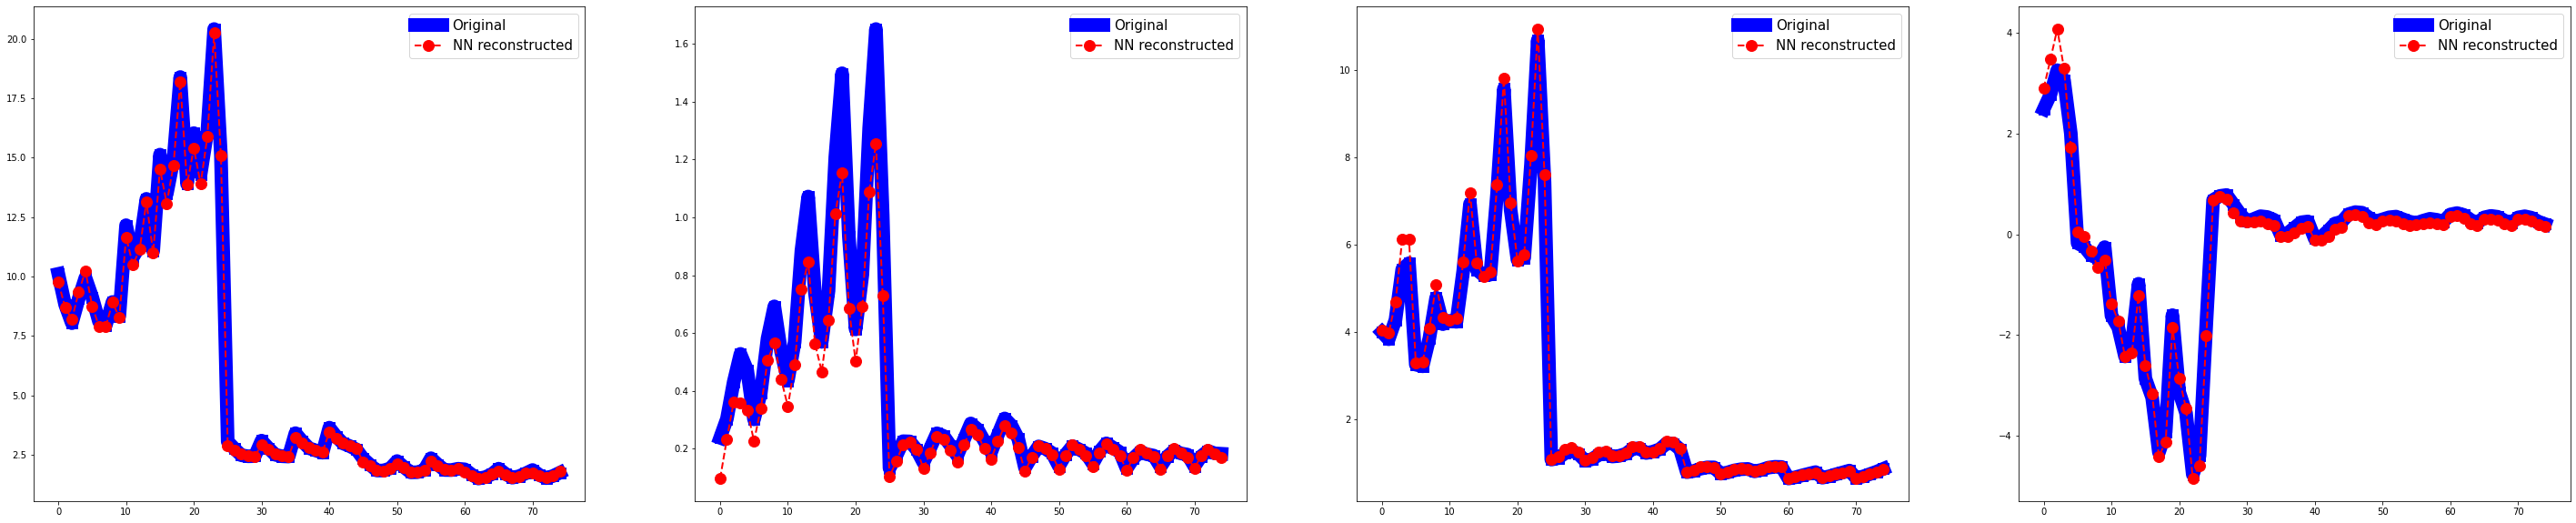

In [1119]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    pred = predicted_COSEBIs_Emodes[i]
    true = testing_COSEBIs_E_modes[i]
    ax[i].plot(true, 'blue', linewidth=15, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('true_examples_reconstruction_PP.pdf')

* Zoom in version

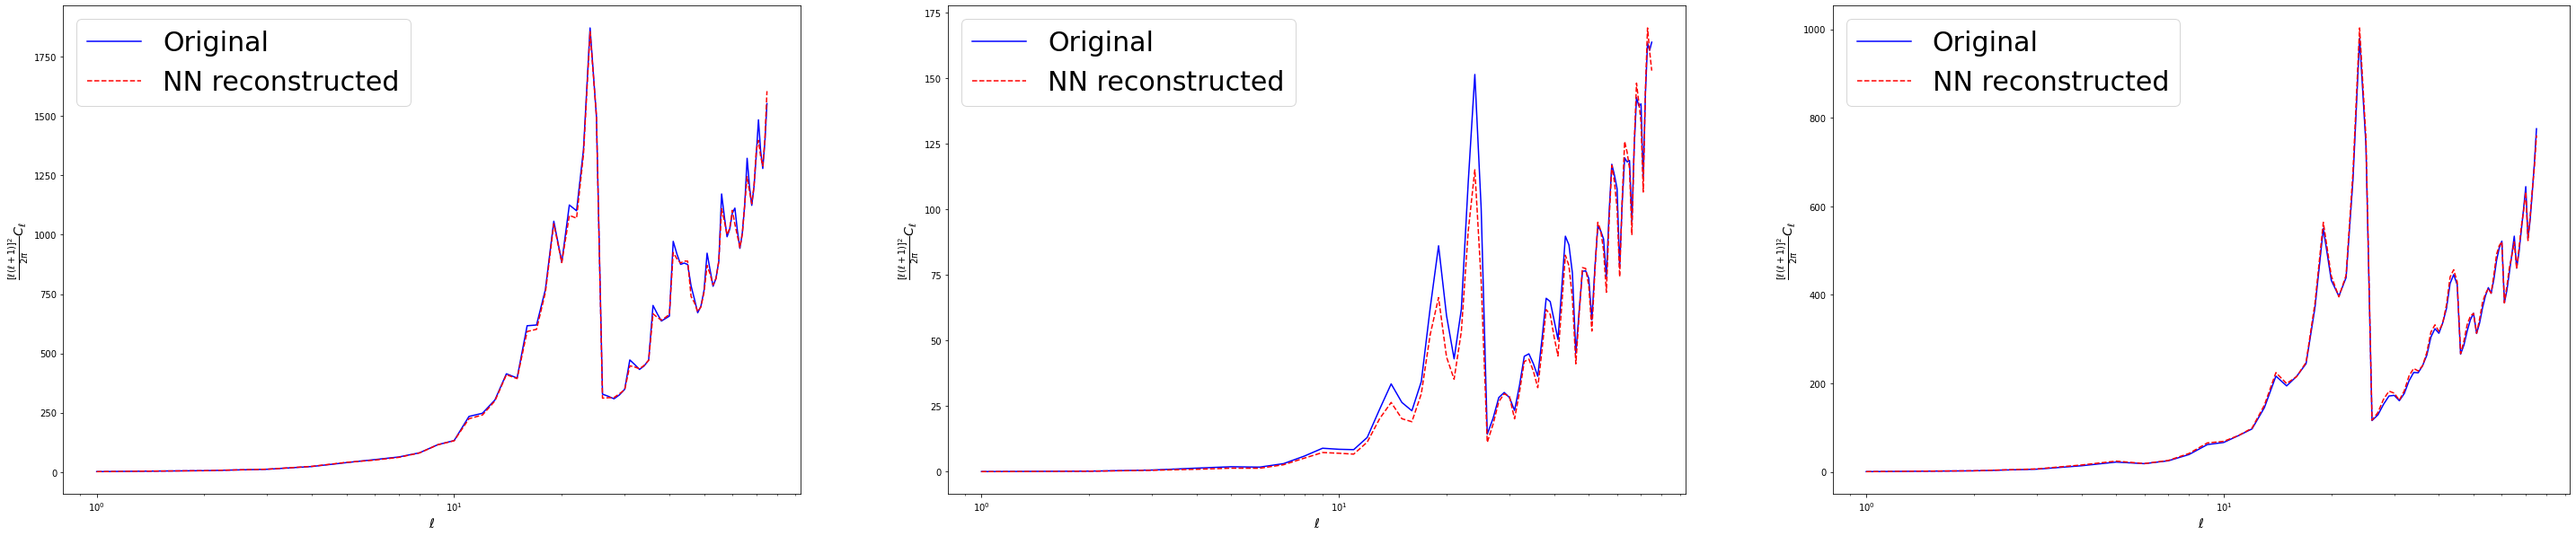

In [1120]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_COSEBIs_Emodes[i]*output_modes*output_modes/(2.*np.pi)
    true = testing_COSEBIs_E_modes[i]*output_modes*output_modes/(2.*np.pi)
    ax[i].semilogx(output_modes, true, 'blue', label = 'Original') 
    ax[i].semilogx(output_modes, pred, 'red', label = 'NN reconstructed', linestyle='--')
    ax[i].set_xlabel('$\ell$', fontsize='x-large')
    ax[i].set_ylabel('$\\frac{[\ell(\ell+1)]^2}{2 \pi} C_\ell$', fontsize='x-large')
    ax[i].legend(fontsize=30) 
    
#Saving the pdf
plt.savefig('examples_reconstruction_PP.pdf') 

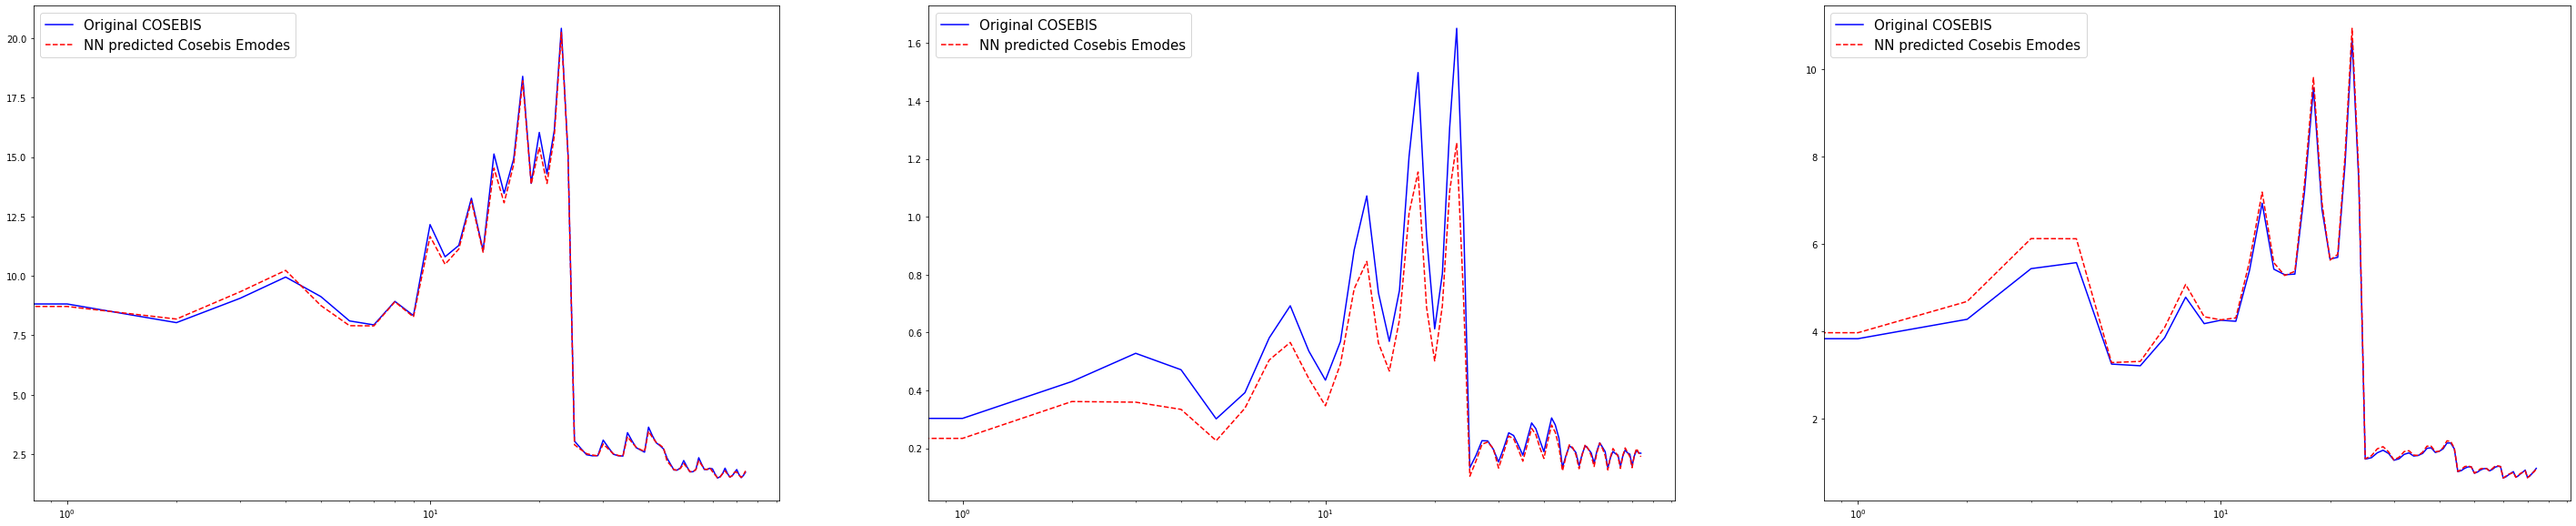

In [1121]:
from matplotlib import gridspec
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_COSEBIs_Emodes[i] 
    true = testing_COSEBIs_E_modes[i]
    ax[i].semilogx(true, 'blue', label = 'Original COSEBIS')
    ax[i].semilogx(pred, 'red', label = 'NN predicted Cosebis Emodes', linestyle='--')
#     ax[i].set_xlabel('$\ell$', fontsize='x-large')
#     ax[i].set_ylabel('$\\frac{\ell(\ell+1)}{2 \pi} C_\ell$', fontsize='x-large')
    ax[i].legend(fontsize=15)
    
# Saving the pdf
plt.savefig('examples_reconstruction_TT.pdf') 

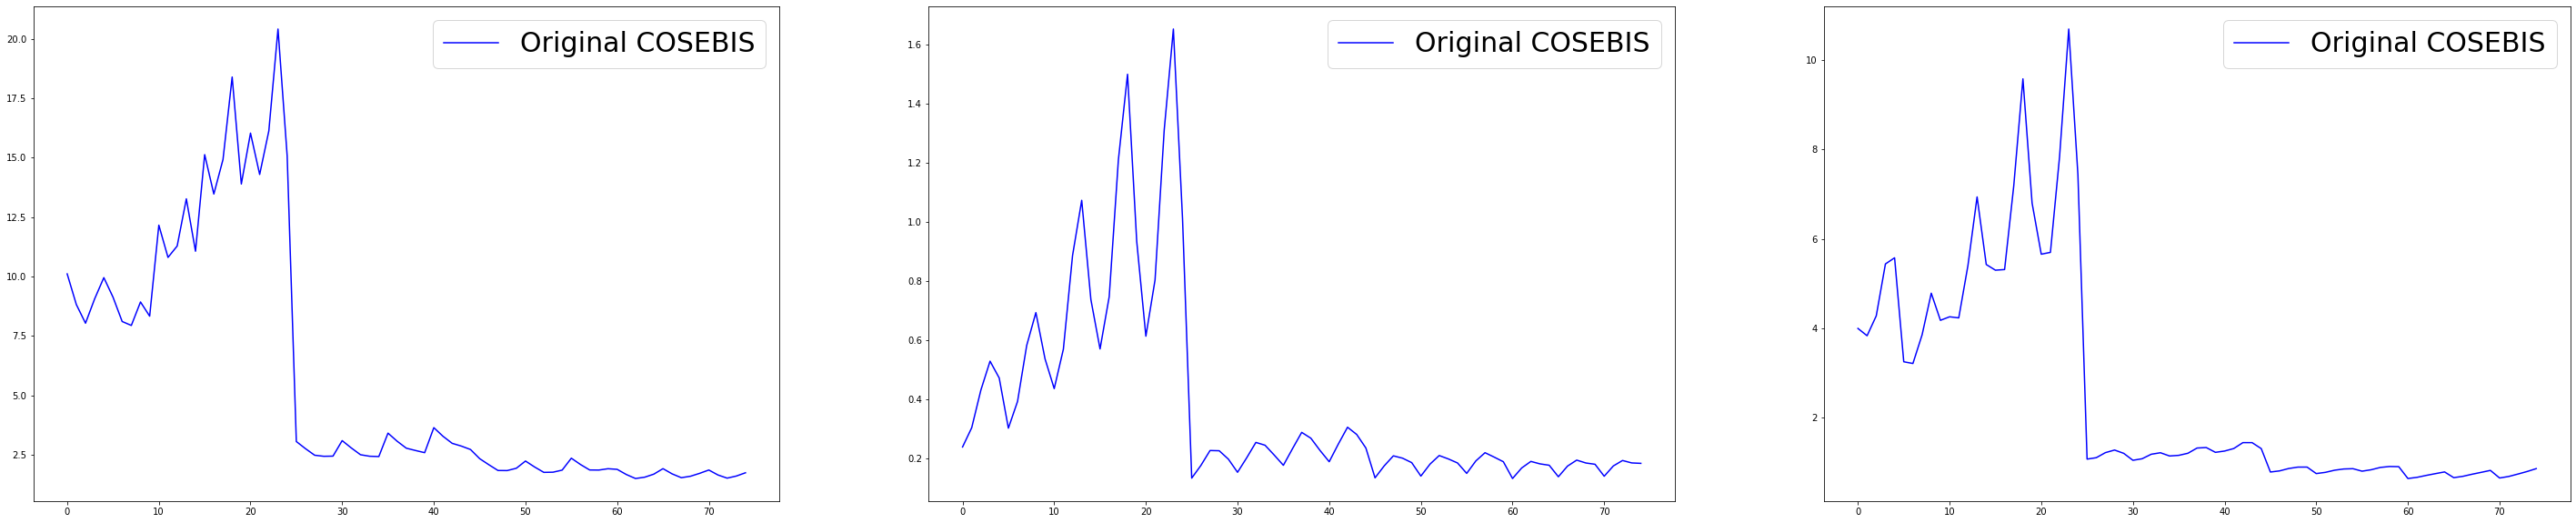

In [1122]:
from matplotlib import gridspec
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_COSEBIs_Emodes[i] 
    true = testing_COSEBIs_E_modes[i] 
    ax[i].plot(true, 'blue', label = 'Original COSEBIS')
#     ax[i].semilogx(pred, 'red', label = 'NN predicted Cosebis Emodes', linestyle='--')
#     ax[i].set_xlabel('$\ell$', fontsize='x-large')
#     ax[i].set_ylabel('$\\frac{\ell(\ell+1)}{2 \pi} C_\ell$', fontsize='x-large')
    ax[i].legend(fontsize=30) 
    
# Saving the pdf
plt.savefig('examples_reconstruction_TT.pdf') 

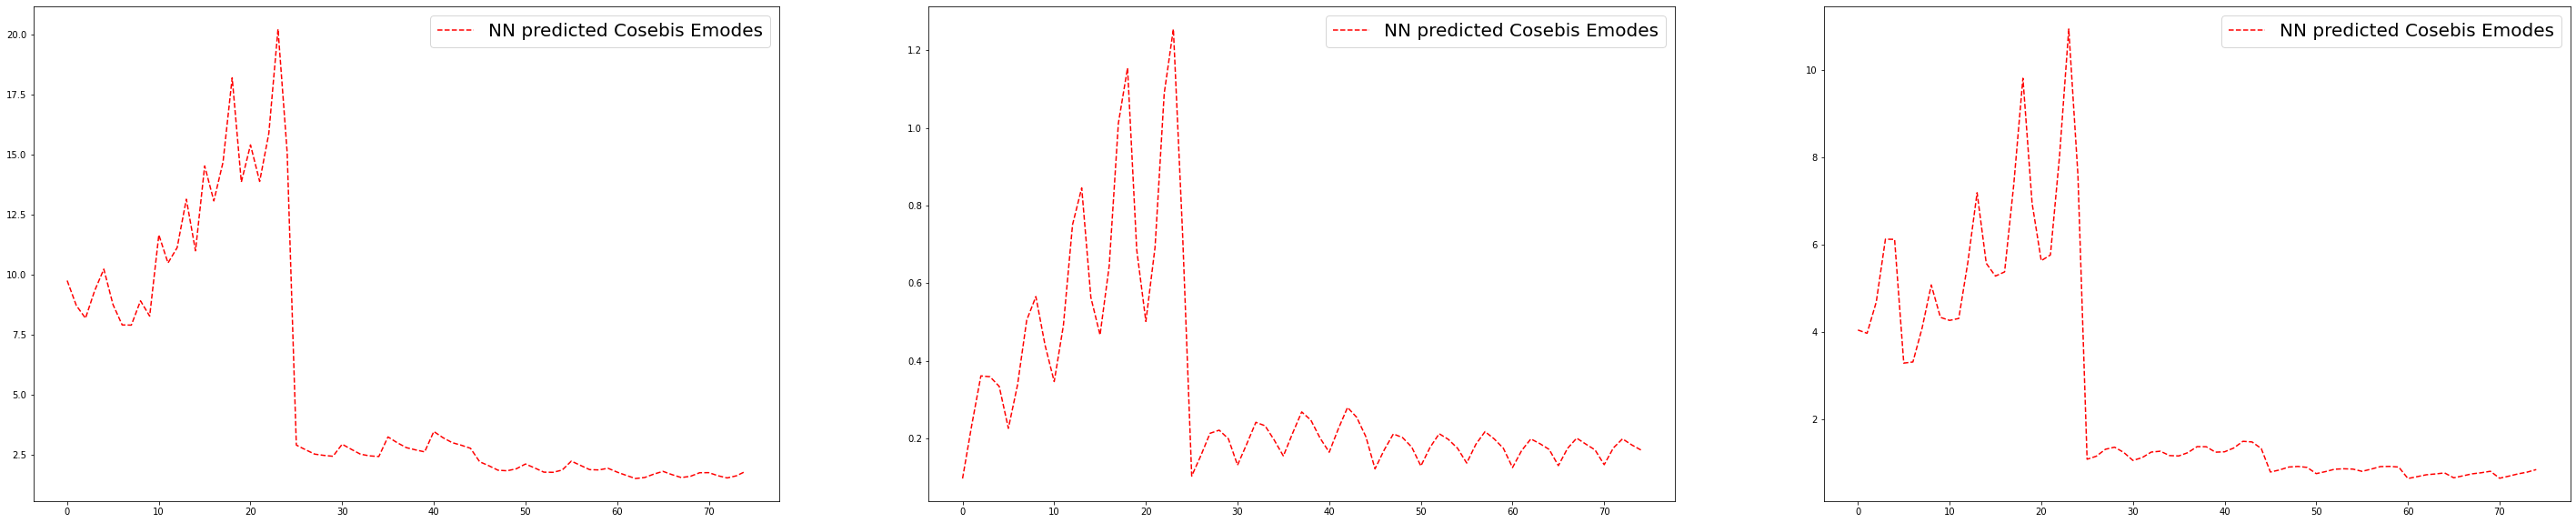

In [1123]:
from matplotlib import gridspec
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_COSEBIs_Emodes[i] 
    true = testing_COSEBIs_E_modes[i] 
#     ax[i].semilogx(true, 'blue', label = 'Original COSEBIS')
    ax[i].plot(pred, 'red', label = 'NN predicted Cosebis Emodes', linestyle='--')
#     ax[i].set_xlabel('$\ell$', fontsize='x-large')
#     ax[i].set_ylabel('$\\frac{\ell(\ell+1)}{2 \pi} C_\ell$', fontsize='x-large')
    ax[i].legend(fontsize=20) 
    
# Saving the pdf
plt.savefig('examples_reconstruction_TT.pdf') 

In [1124]:
print('emulator parameters: ', cp_nn.parameters)

emulator parameters:  ListWrapper(['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A'])


In [1125]:
print('sampled multipoles: ', cp_nn.modes)
print('number of multipoles: ', cp_nn.n_modes)

sampled multipoles:  ListWrapper([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])
number of multipoles:  75


### Accuracy
- This to carry how accurate `cosmopower_NN` predict to the test_data

In [1126]:
# Mean squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = mean_squared_error(testing_COSEBIs_E_modes, predicted_COSEBIs_Emodes, squared=False,)
MSE 

0.22493260082407554

In [1127]:
# Root mean squared error
rmse = mean_squared_error(testing_COSEBIs_E_modes, predicted_COSEBIs_Emodes, squared=True,)
rmse 

0.13176598154066357

In [1128]:
Absolute_mean_error = mean_absolute_error(testing_COSEBIs_E_modes,predicted_COSEBIs_Emodes)
Absolute_mean_error

0.1464929076428251